You want to see the article: Rotterdam in nl 

You're query was succesfull 

Rotterdam
stad in de Nederlandse provincie Zuid-Holland


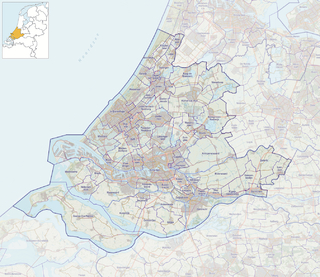

Succesfully found related articles 

 
 The related article found is: Nieuwe_Maas.
 This article's description is: rivier in Nederland. 
 More info is found on https://nl.wikipedia.org/wiki/Nieuwe_Maas

 
 The related article found is: Delfshaven_(stadsdeel).
 This article's description is: bestuurscommissiegebied van Rotterdam en voormalige gemeente. 
 More info is found on https://nl.wikipedia.org/wiki/Delfshaven_(stadsdeel)

 
 The related article found is: Erasmusbrug.
 This article's description is: brug in Rotterdam, Nederland. 
 More info is found on https://nl.wikipedia.org/wiki/Erasmusbrug



In [1]:
#import the necessary libraries
import requests
import json
import webbrowser
from IPython.display import display
from IPython.display import HTML
from IPython.display import Image 

#ask for the user input for article and language
article = input("What article do you want to see?")
language = input("What language do you want to see it in?").strip().lower()

#confirm the article and language to the users
print(f"You want to see the article: {article} in {language} \n")

#changing the input into the two-letter code, so i can insert this into the url
if language == "english": 
    language = "en"
elif language == "dutch":
    language = "nl"
elif language == "spanish":
    language = "es"
else:
    #When a user type a unknown language, they will be asked about the two letter code 
    language = input("What is the two-letter country code?\n")
    language = language.strip().lower()
    
#i use the article and language input to edit the url
url = f'https://{language}.wikipedia.org/api/rest_v1/page/summary/{article}'
#I do a http get request to the url mentioned above
req = requests.get(url)
#Add the text of the wikipedia article into the data variable
data = json.loads(req.text)

#if i receive a statuscode of 200 (Which means that is was sucessfull), i will report this to the user.
if req.status_code == 200: 
    print("You're query was succesfull \n")
    #i use the text of the wikipedia article, which is a dict to print the title 
    print(data["title"])
    #Not all articles have a description, so i check first is there is one available. And if so, i print this. 
    if 'description' in data:
        print(data['description'])
#if i receive something other that a 200 code, i will report an error message. 
else:
    print("Error, try again \n")

#if there is a thumbnail available proces this code
if 'thumbnail' in data: 
    #There are a few layers to get into the thumbnail link. First i need to get into the tumbnail value (Which is a dict) and get the value of the key 'source'
    tumbnail_link = data['thumbnail']['source']
    #use the display.image function to display the available image
    thumbnail = Image(f"{tumbnail_link}")
    display(thumbnail)
#if there is no thumbnail available, report this to the user
else: 
    print("No thumnail image available \n")
#if there are coordinates available process this code.
if 'coordinates' in data: 
    #coordinates are divided in latitude and longitude. To get there i first need to use the data dict, to get to the coordinates dict and save the value of 'lat' and 'lon' to the variable 
    lat =  data['coordinates']['lat']
    lon =  data['coordinates']['lon']
    #ask the user is they want to open this coordinate in google maps..
    user_input_coordinates = input("Do you want to open these coordinates in google maps? Y/N \n").strip().lower()
    #if yes use the webbrowser library to open it. If not, continue with the code
    if user_input_coordinates == "y":
            webbrowser.open(f"http://maps.google.com/?q={lat},{lon}")

#use the related articles API from wikipedia and use the same variables as with the first url (article and language)
url_related = f'https://{language}.wikipedia.org/api/rest_v1/page/related/{article}'
#repeat the same get request as above, but now for the related urls
request_related = requests.get(url_related)
data_related = json.loads(request_related.text)
#create an empty list which will be filled with the dict of related articles.
related_list = []

#if there is a status code of 200, continue this piece of code.
if request_related.status_code == 200: 
    #report the meaning of the status code to the user.
    print("Succesfully found related articles \n")
    #use the enumerate function to go through the dict of the pages found
    for index, lines in enumerate(data_related['pages']):
        #use the enumerate function to find the location/index of the items
        item = data_related['pages'][index]
        #assign the title value to the variable title
        title = item['title']
        #if there is a description, add this value to the variable description
        if 'description' in item:
            description = item['description']
        #The url for the related items is placed under three levels. The dict item has a dict of content_url and this dict has a key: page with the url as a value. 
        url_path = item['content_urls']['desktop']
        url_real = url_path['page']
       #if the enumerate index value is under 3 (0,1,2) append these variables in de format {'key' : 'value',} and so it will create one dict per founded article. Which eventually leads up to three dictionaries in one list named related_items.
        if index < 3:
            related_list.append({"title" : title, "description": description, "url": url_real})
#if there were no related articles, report this to the user.            
else: 
    print("Error, did not find related pages \n")
    
#loop through the related_list and print the values of title, description and url in a 'nice' and readable format. 
for related_list_items in related_list: 
	print(f" \n The related article found is: {related_list_items['title']}.\n This article's description is: {related_list_items['description']}. \n More info is found on {related_list_items['url']}\n")


In [ ]:
rk